(2, 40, 2)
(40, 896)
(2, 40, 2)


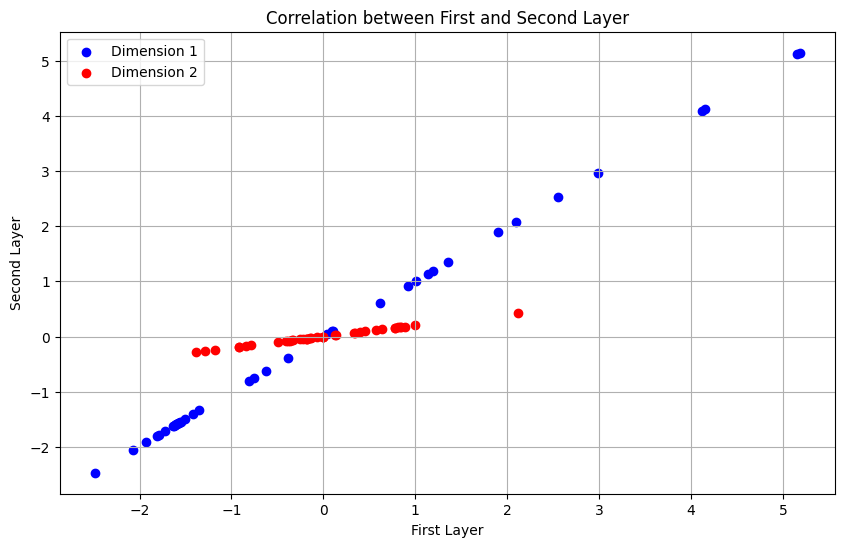

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import os



cca = CCA(n_components=2)

embedding = np.load("E:/Deepfake_datasets/PDD/real/b-1_10.npy")

A_Eb=embedding[0:40,:]
V_Eb=embedding[40:80,:]

cca.fit(A_Eb, V_Eb)
ca_c = cca.transform(A_Eb, V_Eb)
print(np.array(ca_c).shape)

crelation = np.array(ca_c)


print(A_Eb.shape)
print(crelation.shape)


first_layer = crelation [0]
second_layer = crelation [1]

# Plot the first layer against the second layer
plt.figure(figsize=(10, 6))
plt.scatter(first_layer[:, 0], second_layer[:, 0], label='Dimension 1', color='blue')
plt.scatter(first_layer[:, 1], second_layer[:, 1], label='Dimension 2', color='red')

plt.xlabel('First Layer')
plt.ylabel('Second Layer')
plt.title('Correlation between First and Second Layer')
plt.legend()
plt.grid(True)
plt.show()



<BarContainer object of 2 artists>

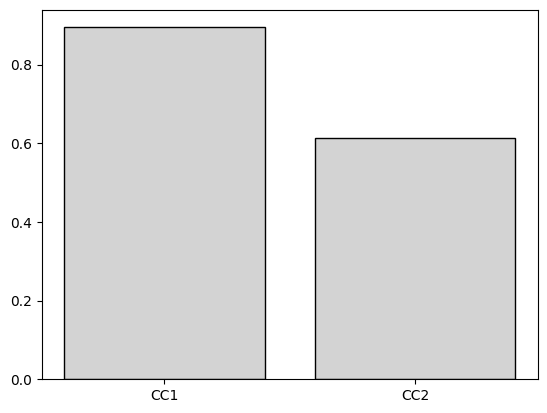

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import os

cca = CCA(n_components=2)

A_Ebs=[]
V_Ebs=[]

fake_dir = "E:/Deepfake_datasets/PDD/fake"

i=1
for filename in os.listdir(fake_dir):
    if filename.endswith(".npy"):
        embedding = np.load(os.path.join(fake_dir, filename))
        
        A_Eb=embedding[0:40,:]
        V_Eb=embedding[40:80,:]
        
        
        cca.fit(A_Eb, V_Eb)
        
        i=i+1
        ca_c_A, ca_c_V = cca.transform(A_Eb, V_Eb)
        A_Ebs.append(ca_c_A)
        V_Ebs.append(ca_c_V)

        
A_Ebs = np.array(A_Ebs)
A_Ebs = np.mean(A_Ebs, axis=0)

V_Ebs = np.array(V_Ebs)
V_Ebs = np.mean(V_Ebs, axis=0)



X1_c, X2_c = V_Ebs, A_Ebs #transform our datasests to obtain canonical variates
comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(2)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

embedding = np.load("E:/Deepfake_datasets/PDD/real/b-1_3.npy")

A_Eb=embedding[0:40,:]
V_Eb=embedding[40:80,:]



# Assuming A_Eb and V_Eb are your audio and visual embeddings respectively
cca = CCA(n_components=2)
cca.fit(A_Eb, V_Eb)
A_c, V_c = cca.transform(A_Eb, V_Eb)

# Scatter plot for the first pair of canonical variates
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(A_c[:, 0], V_c[:, 0], color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Audio Canonical Variate 1')
plt.ylabel('Visual Canonical Variate 1')
plt.title('Canonical Correlation 1')
plt.axline((0, 0), slope=1, color='red', linestyle='--')

# Scatter plot for the second pair of canonical variates
plt.subplot(1, 2, 2)
plt.scatter(A_c[:, 1], V_c[:, 1], color='green', edgecolor='k', alpha=0.7)
plt.xlabel('Audio Canonical Variate 2')
plt.ylabel('Visual Canonical Variate 2')
plt.title('Canonical Correlation 2')
plt.axline((0, 0), slope=1, color='red', linestyle='--')

plt.tight_layout()
plt.show()

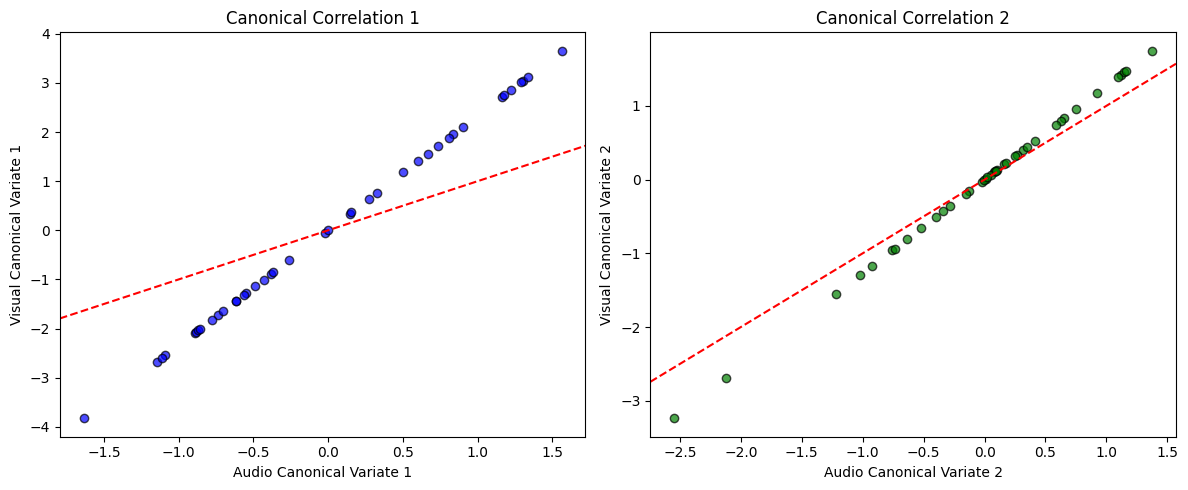

In [6]:
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

A_Ebs=[]
V_Ebs=[]
correlations = []

fake_dir = "E:/Deepfake_datasets/PDD/fake"

i=1
for filename in os.listdir(fake_dir):
    if filename.endswith(".npy"):
        embedding = np.load(os.path.join(fake_dir, filename))
        
        A_Eb=embedding[0:40,:]
        V_Eb=embedding[40:80,:]
        
        
        cca.fit(A_Eb, V_Eb)
        
        i=i+1
        ca_c = cca.transform(A_Eb, V_Eb)
        correlations.append(ca_c)
        
correlations_array = np.array(correlations)
average_correlation = np.mean(correlations_array, axis=0)


A_c, V_c = ca_c[0], ca_c[1]

# Scatter plot for the first pair of canonical variates
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(A_c[:, 0], V_c[:, 0], color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Audio Canonical Variate 1')
plt.ylabel('Visual Canonical Variate 1')
plt.title('Canonical Correlation 1')
plt.axline((0, 0), slope=1, color='red', linestyle='--')

# Scatter plot for the second pair of canonical variates
plt.subplot(1, 2, 2)
plt.scatter(A_c[:, 1], V_c[:, 1], color='green', edgecolor='k', alpha=0.7)
plt.xlabel('Audio Canonical Variate 2')
plt.ylabel('Visual Canonical Variate 2')
plt.title('Canonical Correlation 2')
plt.axline((0, 0), slope=1, color='red', linestyle='--')

plt.tight_layout()
plt.show()

(2, 40, 1)


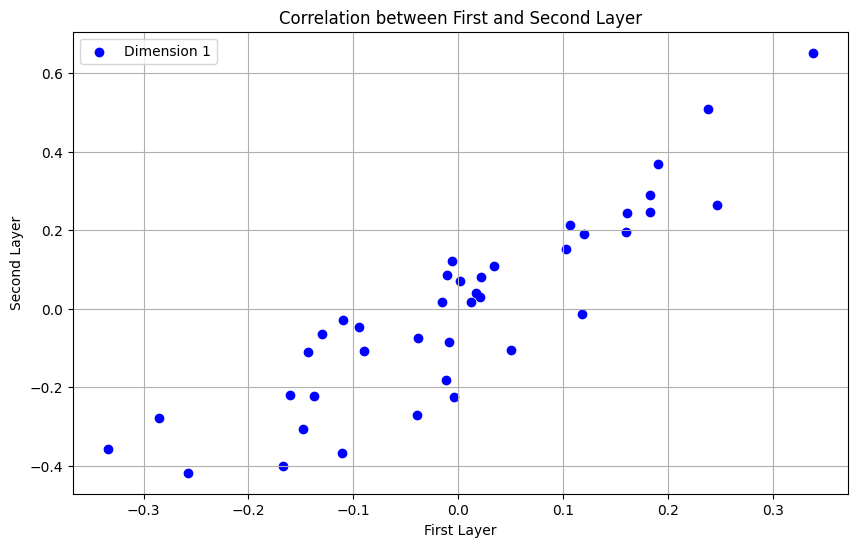

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import os


# Perform Canonical Correlation Analysis
cca = CCA(n_components=1)  # Number of canonical components to retain


A_Ebs=[]
V_Ebs=[]
correlations = []

fake_dir = "E:/Deepfake_datasets/PDD/fake/"

i=1
for filename in os.listdir(fake_dir):
    if filename.endswith(".npy"):
        embedding = np.load(os.path.join(fake_dir, filename))
        
        A_Eb=embedding[0:40,:]
        V_Eb=embedding[40:80,:]
        
        
        cca.fit(A_Eb, V_Eb)
        
        i=i+1
        ca_c = cca.transform(A_Eb, V_Eb)
        correlations.append(ca_c)
        
correlations_array = np.array(correlations)
average_correlation = np.mean(correlations_array, axis=0)

#print(average_correlation)


print(average_correlation.shape)


first_layer = average_correlation [0]
second_layer = average_correlation [1]


average_correlation = np.mean(correlations_array, axis=0)

# Plot the first layer against the second layer
plt.figure(figsize=(10, 6))
plt.scatter(first_layer[:, 0], second_layer[:, 0], label='Dimension 1', color='blue')
#plt.scatter(first_layer[:, 1], second_layer[:, 1], label='Dimension 2', color='red')

plt.xlabel('First Layer')
plt.ylabel('Second Layer')
plt.title('Correlation between First and Second Layer')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Average correlation data
average_correlation_x = np.array([[-0.23302032, -0.23737817, -0.24293477, -0.23803949, -0.20851576,
                                   -0.22512219, -0.19827307, -0.15183435, -0.12632576, -0.14701291,
                                   -0.1198905, -0.07704345, -0.09843253, -0.14021841, -0.13715284,
                                   -0.09538155, -0.05226208, -0.08297327, -0.06422525, -0.00365628,
                                   -0.0168459, -0.0998112, -0.15130054, -0.14909347, -0.11940352,
                                   -0.14486716, -0.15470883, -0.12399228, -0.06187634, -0.04293692,
                                   -0.04957253, -0.0759495, -0.14245138, -0.19230533, -0.20112948,
                                   -0.15213261, -0.07347558, -0.01558221, -0.01740746, -0.11494515]])

average_correlation_y = np.array([[0.3785692, 0.23943984, 0.51020434, 0.24323853, 0.16812228,
                                   0.08586701, 0.40554298, 0.78378986, 0.39586224, 0.26073599,
                                   0.40201609, 0.34707606, 0.50936351, 0.78501131, 0.68931144,
                                   0.62773753, 0.80781523, 0.82921671, 0.86930544, 0.8289899,
                                   1.00104459, 0.91389445, 0.86476446, 0.80924717, 0.80815158,
                                   0.8873761, 0.5955243, 0.41852224, 0.58781828, 0.48724165,
                                   0.41673698, 0.58882469, 0.85983073, 0.84425398, 0.66773895,
                                   0.5050787, 0.52033412, 0.65515337, 0.56416684, 0.78428536]])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(average_correlation_x, average_correlation_y)
plt.title('Average Correlation')
plt.xlabel('Canonical Correlation (X)')
plt.ylabel('Canonical Correlation (Y)')
plt.grid(True)
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Average correlation data
average_correlation_x = np.array([[-0.42451426, -0.35068519, -0.30318829, -0.27359305, -0.25298142,
                                   -0.28454256, -0.32274162, -0.35922744, -0.38355674, -0.41092106,
                                   -0.45712191, -0.51594242, -0.57313489, -0.59846566, -0.6324025,
                                   -0.66944562, -0.68014155, -0.65445745, -0.62293095, -0.5874586,
                                   -0.53314291, -0.49265587, -0.47645147, -0.47353895, -0.41038575,
                                   -0.3577349, -0.32308396, -0.31351867, -0.35858741, -0.37432235,
                                   -0.38873381, -0.41638421, -0.46956876, -0.44057606, -0.40446969,
                                   -0.40690508, -0.38007874, -0.39952334, -0.42830354, -0.43525974]])

average_correlation_y = np.array([[0.50413194, 0.4080889, 0.35377848, 0.3244751, 0.30193281,
                                   0.31293075, 0.34958451, 0.41418628, 0.51291695, 0.55074922,
                                   0.5169717, 0.43262006, 0.33817898, 0.44815583, 0.60870783,
                                   0.76375281, 0.81362975, 0.79291505, 0.73962074, 0.6716178,
                                   0.62836998, 0.57759655, 0.54929114, 0.53892966, 0.4797634,
                                   0.46081623, 0.47648104, 0.5238779, 0.58900544, 0.59615775,
                                   0.58679894, 0.57942452, 0.56182239, 0.51215447, 0.48467073,
                                   0.51290519, 0.52511682, 0.55972223, 0.59933158, 0.62930176]])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(average_correlation_x, average_correlation_y)
plt.title('Average Correlation')
plt.xlabel('Canonical Correlation (X)')
plt.ylabel('Canonical Correlation (Y)')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data_x = np.array([[-1.4955419, -1.31632853, -1.21182507, -1.17733527, -1.21105138, -1.2766944,
                    -1.39045318, -1.47741369, -1.41867221, -1.30144405, -1.05055493, -0.82466766,
                    -0.96427156, -1.12171136, -1.32072135, -1.47098069, -1.31129846, -1.36345695,
                    -1.4098132, -1.36419057, -1.05491068, -1.06365352, -1.13612503, -1.16891089,
                    -0.97057717, -0.94182794, -0.94752216, -0.9430637, -0.95510578, -1.15553009,
                    -1.35384108, -1.45065344, -1.36400001, -1.16414257, -0.97315856, -0.88195015,
                    -1.2019692, -1.29882035, -1.33731741, -1.45575028]])

data_y = np.array([[1.92080571, 1.70713278, 1.55817074, 1.44940687, 1.35428705, 1.29066515,
                    1.39543737, 1.53631778, 1.50365453, 1.43350531, 1.40514318, 1.45154619,
                    1.63406107, 1.87204203, 2.05957357, 2.12693779, 1.91072265, 2.01685165,
                    2.17033872, 2.23200307, 1.87181052, 1.77261952, 1.66726162, 1.49858096,
                    1.33954978, 1.39422905, 1.46142262, 1.48640579, 1.60675211, 1.82137415,
                    1.94633984, 1.90438092, 1.89730673, 1.82109535, 1.77582689, 1.83101129,
                    2.07436934, 2.08095314, 2.04311448, 2.12331511]])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(data_x, data_y)
plt.title('Scatter Plot of Data')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

data_x = [[-0.48195213, -0.45162787, -0.43358509, -0.42805517, -0.43893986, -0.43523563,
           -0.42426531, -0.41856498, -0.41939316, -0.43182596, -0.44814265, -0.45199396,
           -0.45784785, -0.45449077, -0.45167088, -0.48031822, -0.48119498, -0.47871961,
           -0.4747852, -0.45895904, -0.46855033, -0.47627001, -0.47763304, -0.48725957,
           -0.47072736, -0.46195327, -0.4715597, -0.4849213, -0.48723527, -0.48617991,
           -0.48487834, -0.47746375, -0.46770378, -0.4635022, -0.46938927, -0.46214519,
           -0.45745186, -0.45285363, -0.44625519]]

data_y = [[0.13455266, 0.52840545, 0.97971784, 1.1647159, 1.25466315, 1.99558292,
           0.73438075, 1.48889423, 2.07460249, 2.51010827, 2.52326859, 3.21708797,
           2.42986233, 1.40084909, 1.99709139, 2.86109432, 1.85858652, 0.89531091,
           1.52787837, 1.49411718, 1.94077155, 1.62922008, 1.84142982, 2.215464,
           2.38552125, 2.77833935, 1.1875487, 0.96393992, 0.99040741, 0.7049429,
           1.47023951, 1.14042621, 1.38073424, 0.68461471, 1.75409996, 0.97345618,
           0.48909527, 1.51378368, 2.02213046]]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(data_x, data_y)
plt.title('Scatter Plot of Data')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.show()
